In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr

<font style="color:red; font-size:2.5em">Análisis Exploratorio de Datos (AED) </font>

El AED representa una colección visual y numérica de metodos empleado en el análisis de datos espaciales (para este caso).

Los métodos del AED incluyen: <br>

<ol>
    <li>Estadística descriptiva</li>
    <li>Identificación de interacciones, relaciones y patrones mediante el uso de matrices de pesos espaciales, test de hipótesis y otras métricas.</li>
</ol>

<font style="color:green; font-size:2em">Estadística descriptiva</font>

Los procedimientos estadísticos son esenciales para resumir las características de un conjunto de datos mediante técnicas descriptivas como: <br>

<ol>
    <li>Distribución de frecuencias</li>
    <li>Medidas centrales como promedio, mediana y desviación estándar</li>
    <li>Error estándar</li>
    <li>Percentiles y quartiles</li>
    <li>Atípicos</li>
    <li>Diagramas de caja</li>
    <li>Gráfico de normalidad QQ</li>
</ol>

Otros procedimientos relacionados al análisis de muestras se centran en la estadísitica inferencial, la cual nos permite generar conclusiones de nuestro conjunto de datos a partir del planteamiento de hipótesis.

<font style="color:red; font-size:2.5em">Ejemplo</font>

In [2]:
precipitaciones = pd.read_csv("precipitaciones.csv")
precipitaciones.head()

,x,y,prec,Fechas
0,-74.874519,5.824798,0.0,2016-01-01
1,-74.824519,5.824798,0.0,2016-01-01
2,-74.774519,5.824798,0.0,2016-01-01
3,-74.724518,5.824798,0.0,2016-01-01
4,-74.674518,5.824798,0.0,2016-01-01


In [3]:
precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580715 entries, 0 to 580714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       580715 non-null  float64
 1   y       580715 non-null  float64
 2   prec    580715 non-null  float64
 3   Fechas  580715 non-null  object 
dtypes: float64(3), object(1)
memory usage: 17.7+ MB


<font style="color:blue; font-size:1.5em">Descripción de los datos</font>

In [4]:
precipitaciones.describe()

,x,y,prec
count,580715.000000,580715.000000,580715.000000
mean,-73.974515,4.774793,5.418616
std,0.533857,0.620487,11.559269
min,-74.874519,3.724788,0.000000
25%,-74.424517,4.224791,0.000000
50%,-73.974515,4.774793,0.000000
75%,-73.524513,5.324796,6.553780
max,-73.074511,5.824798,172.704163


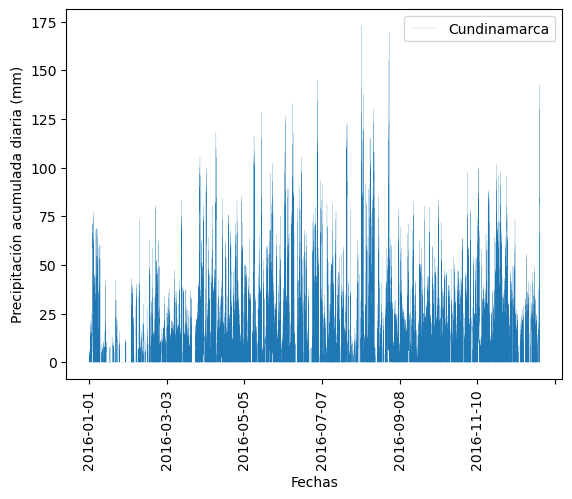

In [5]:
precipitaciones.plot(kind="line", x="Fechas",y="prec", linewidth=0.1,label="Cundinamarca")
plt.legend()
plt.xticks(rotation=90)
plt.ylabel("Precipitación acumulada diaria (mm)")
plt.show()

<Axes: ylabel='Frequency'>

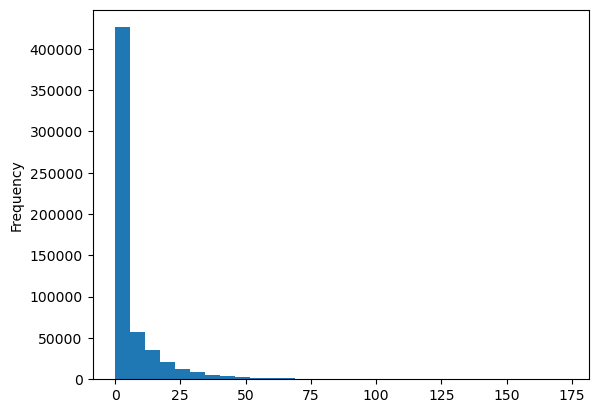

In [6]:
precipitaciones.prec.plot(kind="hist", bins=30)

<Axes: ylabel='Density'>

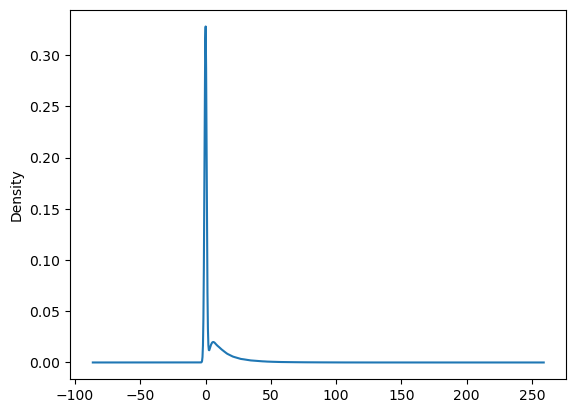

In [7]:
precipitaciones.prec.plot(kind="kde")

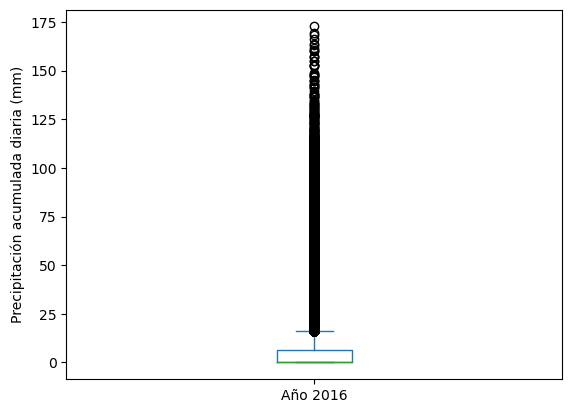

In [8]:
precipitaciones.prec.plot(kind="box")
plt.xticks([1], ['Año 2016'])
plt.ylabel("Precipitación acumulada diaria (mm)")
plt.show()

In [9]:
ValoresNA = precipitaciones['prec'].isna().sum()
ValoresNA

0

<font style="color:blue; font-size:1.5em">Descripción de los datos por mes</font>

In [10]:
meses = np.array(["01","02","03","04","05","06","07","08","09","10","11","12"])
meses

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype='<U2')

In [11]:
promedioMes = []
desviacionE = []

for i in meses:
    pM= precipitaciones[precipitaciones["Fechas"].str.contains("-"+str(i)+"-")]
    prom = pM["prec"].mean()
    desv = pM["prec"].std()
    promedioMes.append(prom)
    desviacionE.append(desv)


In [12]:
promedioMes = np.array(promedioMes)
desviacionE = np.array(desviacionE)

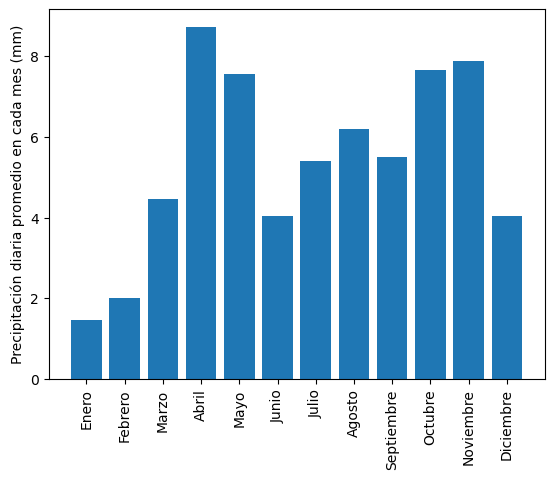

In [13]:
plt.bar(meses,promedioMes)
plt.xticks(meses,
           ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
            "Agosto","Septiembre","Octubre","Noviembre","Diciembre"],
          rotation =90)
plt.ylabel("Precipitación diaria promedio en cada mes (mm)")
plt.show()

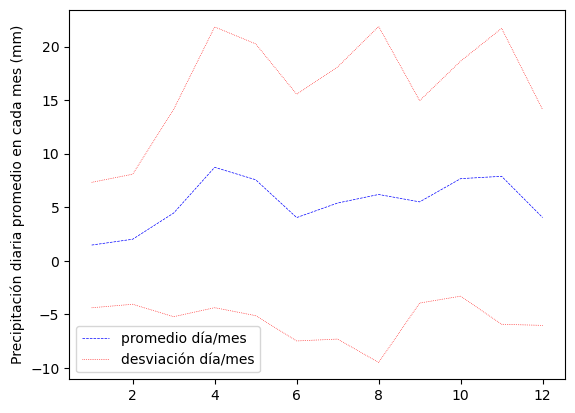

In [14]:
plt.plot(np.arange(1,13),promedioMes,linestyle="dashed", markersize=6, linewidth=0.5, color="blue", label="promedio día/mes")
plt.plot(np.arange(1,13),promedioMes+desviacionE,linestyle="dotted", markersize=12, linewidth=0.5, color="red")
plt.plot(np.arange(1,13),promedioMes-desviacionE,linestyle="dotted", markersize=12, linewidth=0.5, color="red",label="desviación día/mes")
plt.legend()
plt.ylabel("Precipitación diaria promedio en cada mes (mm)")
plt.show()

In [15]:
precipitaciones['Fechas']= pd.to_datetime(precipitaciones['Fechas'])
precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580715 entries, 0 to 580714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   x       580715 non-null  float64       
 1   y       580715 non-null  float64       
 2   prec    580715 non-null  float64       
 3   Fechas  580715 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 17.7 MB


In [16]:
precipitaciones.insert(4,"anio", precipitaciones.Fechas.dt.year)

In [17]:
precipitaciones.insert(5,"mes", precipitaciones.Fechas.dt.month)

In [18]:
precipitaciones.insert(6,"dia", precipitaciones.Fechas.dt.day)

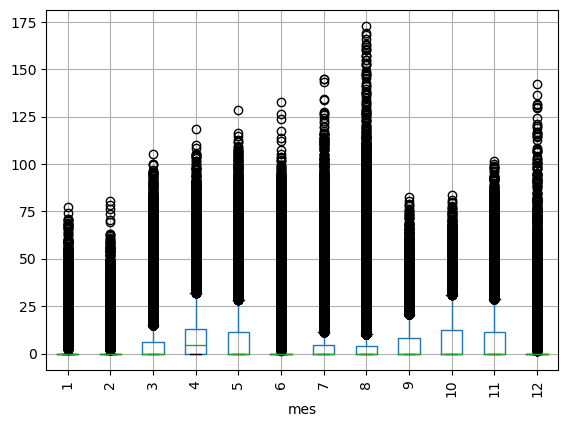

In [19]:
precipitaciones.reset_index().boxplot(column="prec",by="mes")
plt.xticks(rotation =90)
plt.title("")
plt.suptitle("")
plt.show()


In [20]:
precipitaciones.set_index("Fechas", inplace=True)

In [21]:
precipitaciones

,x,y,prec,anio,mes,dia
Fechas,,,,,,
2016-01-01,-74.874519,5.824798,0.000000,2016,1,1
2016-01-01,-74.824519,5.824798,0.000000,2016,1,1
2016-01-01,-74.774519,5.824798,0.000000,2016,1,1
2016-01-01,-74.724518,5.824798,0.000000,2016,1,1
2016-01-01,-74.674518,5.824798,0.000000,2016,1,1
...,...,...,...,...,...,...
2016-12-30,-73.274512,3.724788,34.584312,2016,12,30
2016-12-30,-73.224512,3.724788,36.992443,2016,12,30
2016-12-30,-73.174511,3.724788,39.619892,2016,12,30


In [22]:
PrecPromT=precipitaciones.groupby(precipitaciones.index.strftime("%m-%d")).mean()

In [23]:
PrecPromT=PrecPromT.reset_index(drop=True)

In [24]:
PrecPromT

,x,y,prec,anio,mes,dia
0,-73.974515,4.774793,0.066413,2016.0,1.0,1.0
1,-73.974515,4.774793,0.476821,2016.0,1.0,2.0
2,-73.974515,4.774793,0.049582,2016.0,1.0,3.0
3,-73.974515,4.774793,12.654971,2016.0,1.0,4.0
4,-73.974515,4.774793,6.891699,2016.0,1.0,5.0
...,...,...,...,...,...,...
360,-73.974515,4.774793,4.784817,2016.0,12.0,26.0
361,-73.974515,4.774793,2.073481,2016.0,12.0,27.0
362,-73.974515,4.774793,2.151452,2016.0,12.0,28.0
363,-73.974515,4.774793,0.000000,2016.0,12.0,29.0


In [25]:
Fecha = pd.Series(pd.date_range(start="2016-01-01", end="2016-12-30",freq="D"))
PrecPromT["Fecha"]= Fecha
PrecPromT.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   x       365 non-null    float64       
 1   y       365 non-null    float64       
 2   prec    365 non-null    float64       
 3   anio    365 non-null    float64       
 4   mes     365 non-null    float64       
 5   dia     365 non-null    float64       
 6   Fecha   365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB


In [26]:
PreAcumMes = PrecPromT.groupby(PrecPromT.Fecha.dt.month).sum()

C:\Users\valiz\AppData\Local\Temp\ipykernel_19344\962350116.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PreAcumMes = PrecPromT.groupby(PrecPromT.Fecha.dt.month).sum()


In [27]:
PreAcumMes

,x,y,prec,anio,mes,dia
Fecha,,,,,,
1,-2293.209965,148.018587,45.402596,62496.0,31.0,496.0
2,-2145.260935,138.469001,58.253460,58464.0,58.0,435.0
3,-2293.209965,148.018587,138.082276,62496.0,93.0,496.0
4,-2219.235450,143.243794,261.764384,60480.0,120.0,465.0
5,-2293.209965,148.018587,234.405867,62496.0,155.0,496.0
6,-2219.235450,143.243794,120.896334,60480.0,180.0,465.0
7,-2293.209965,148.018587,167.098849,62496.0,217.0,496.0
8,-2293.209965,148.018587,191.809821,62496.0,248.0,496.0
9,-2219.235450,143.243794,164.891634,60480.0,270.0,465.0


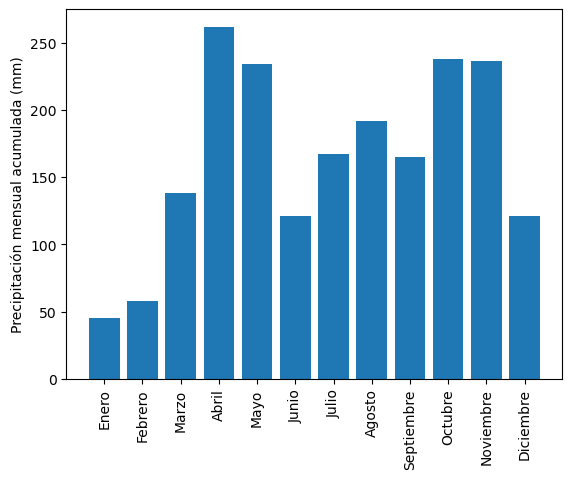

In [28]:
plt.bar(x=meses, height=PreAcumMes["prec"])
plt.xticks(meses,
           ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
            "Agosto","Septiembre","Octubre","Noviembre","Diciembre"],
          rotation =90)
plt.ylabel("Precipitación mensual acumulada (mm)")
plt.show()

In [29]:
ArregloEspacial = precipitaciones.reset_index()
ArregloEspacial = ArregloEspacial.drop(ArregloEspacial.columns[[4,5,6]], axis=1)
ArregloEspacial = ArregloEspacial.set_index(["Fechas","x","y"])

ArregloEspacial

prec
Fechas     x          y                  
2016-01-01 -74.874519 5.824798   0.000000
           -74.824519 5.824798   0.000000
           -74.774519 5.824798   0.000000
           -74.724518 5.824798   0.000000
           -74.674518 5.824798   0.000000
...                                   ...
2016-12-30 -73.274512 3.724788  34.584312
           -73.224512 3.724788  36.992443
           -73.174511 3.724788  39.619892
           -73.124511 3.724788  37.605827
           -73.074511 3.724788  41.212269

[580715 rows x 1 columns]

In [30]:
ArregloEspacial = ArregloEspacial.to_xarray()

In [31]:
ArregloEspacial

<xarray.Dataset>
Dimensions:  (Fechas: 365, x: 37, y: 43)
Coordinates:
  * Fechas   (Fechas) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-30
  * x        (x) float64 -74.87 -74.82 -74.77 -74.72 ... -73.17 -73.12 -73.07
  * y        (y) float64 3.725 3.775 3.825 3.875 ... 5.675 5.725 5.775 5.825
Data variables:
    prec     (Fechas, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [32]:
prec = ArregloEspacial.prec
prec

<xarray.DataArray 'prec' (Fechas: 365, x: 37, y: 43)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 6.63898897,  6.35041332,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 6.68744516,  6.78989172,  5.71498871, ...,  0.        ,
          0.        ,  0.        ]],

       [[19.21836853, 10.86976242,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [18.32928848, 13.00996113, 15.1785059 , ...,  0.        ,
          0.        ,  0.        ],
        [15.98054695, 13.7790966 , 12.73519421, ..., 12.79759312,
          0.        ,  0.        ],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[19.14231873, 21.02733421, 29.3620491 , ...,  8.69268322,
          9.34696293,  9.57545853],
        [18.86038971, 19.57614326, 20.75751686, ...,  9.89238167,
          8.97245121,  8.20305157],
        [20.92277527, 26.70120621, 14.303339  , ...,  9.3172245 ,
          8.74923325,  9.17637634],
        ...,
        [39.61989212, 34.93318176, 30.12523842, ...,  0.        ,
          0.        ,  0.        ],
        [37.60582733, 29.32328224, 29.57047844, ...,  0.        ,
          0.        ,  0.        ],
        [41.21226883, 32.96171188, 18.97875786, ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * Fechas   (Fechas) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-30
  * x        (x) float64 -74.87 -74.82 -74.77 -74.72 ... -73.17 -73.12 -73.07
  * y        (y) float64 3.725 3.775 3.825 3.875 ... 5.675 5.725 5.775 5.825

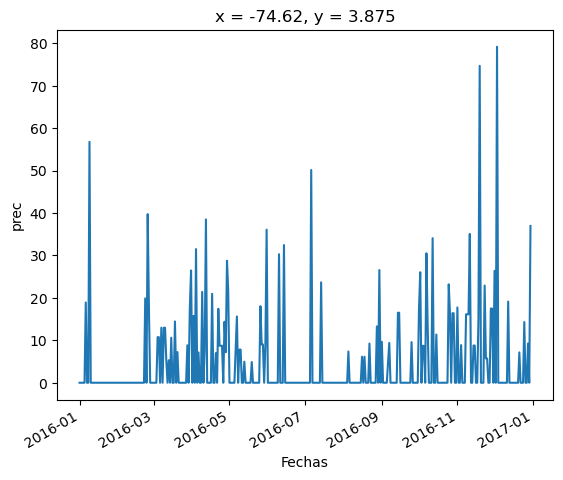

In [33]:
prec1 = prec.isel(y=3, x=5)
prec1.plot()

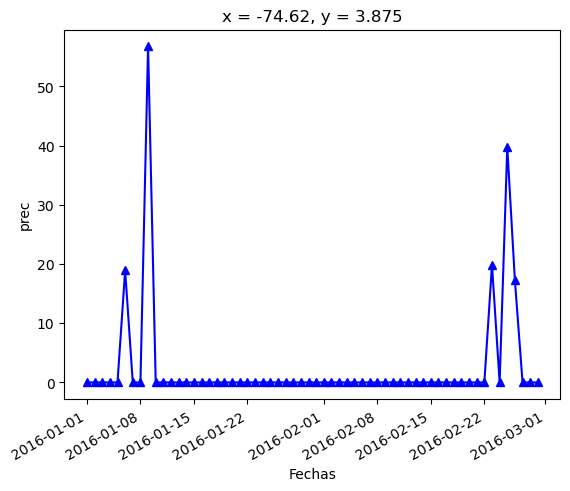

In [34]:
prec1[:60].plot.line("b-^")

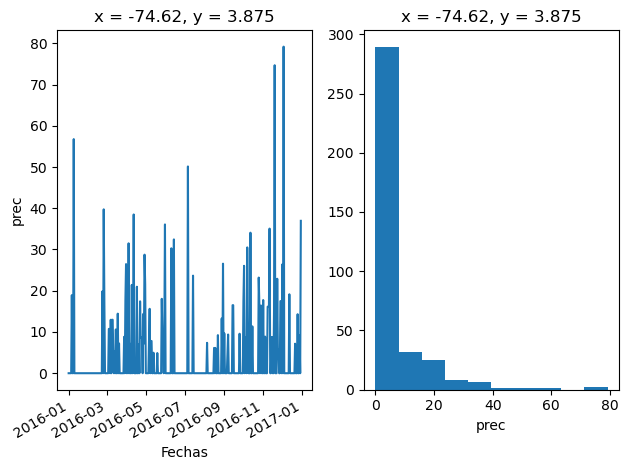

In [35]:
fig, axs = plt.subplots(ncols=2)

axs

prec1.plot(ax=axs[0])

prec1.plot.hist(ax=axs[1])

plt.tight_layout()

plt.draw()

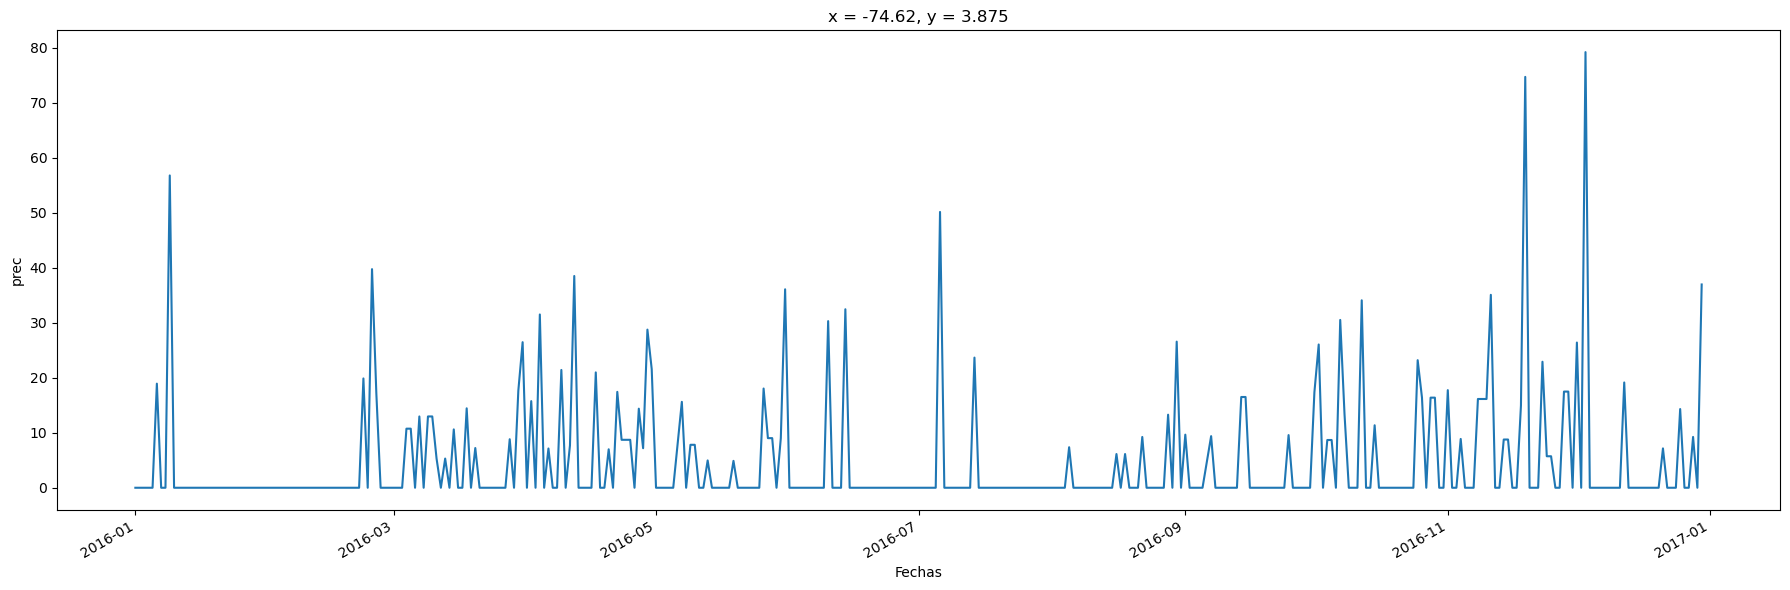

In [36]:
prec1.plot(aspect=3, size=6)

plt.tight_layout()

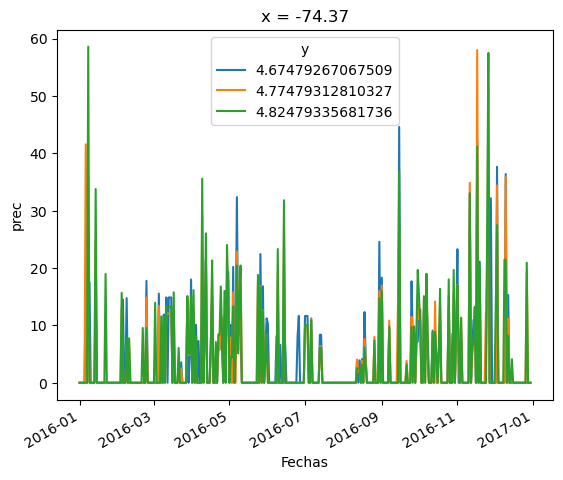

In [37]:
prec.isel(x=10, y=[19, 21, 22]).plot.line(x="Fechas")

Text(0, 0.5, 'Latitudes')

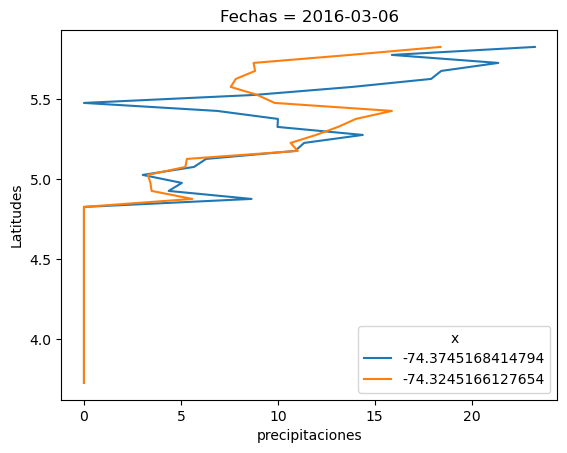

In [38]:
prec.isel(Fechas=65, x=[10, 11]).plot(y="y", hue="x")
plt.xlabel("precipitaciones")
plt.ylabel("Latitudes")

In [39]:
prec2 = prec.isel(Fechas=100)

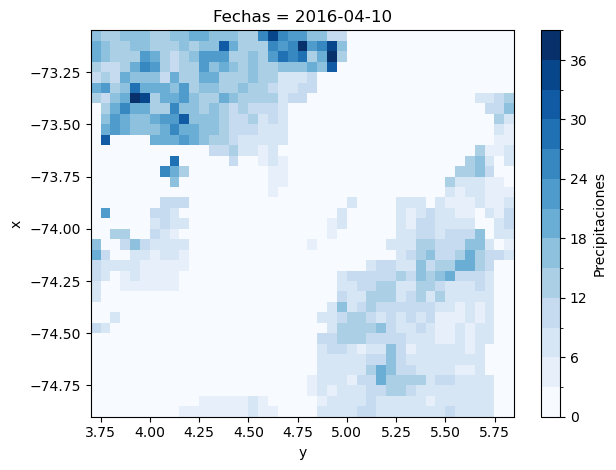

In [40]:
prec2.plot(cmap=plt.cm.Blues,cbar_kwargs={"label": "Precipitaciones"},levels=15)
plt.tight_layout()
plt.draw()

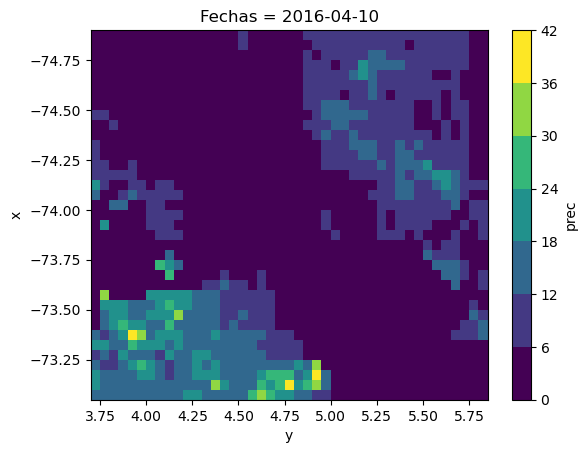

In [41]:
prec2.plot(yincrease=False,levels=8)

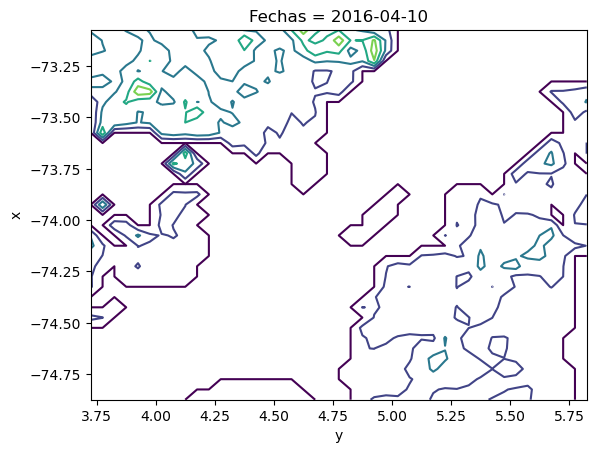

In [42]:
prec2.plot.contour()

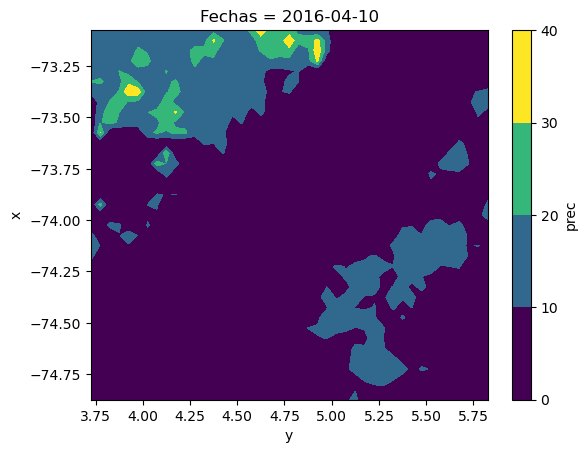

In [43]:
prec2.plot.contourf(levels=5)

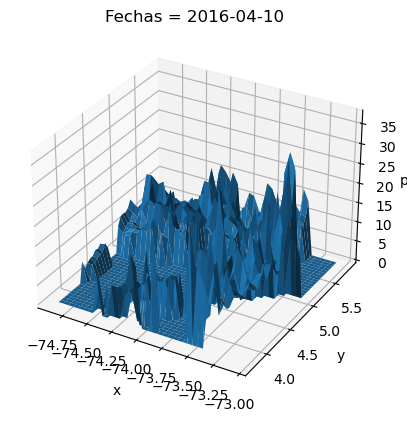

In [44]:
prec2.T.plot.surface()

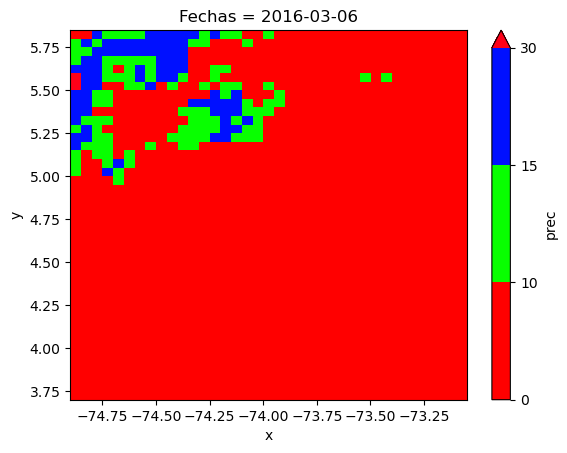

In [45]:
ArregloEspacial.prec.isel(Fechas=65).plot(x="x",y="y",cmap="hsv",levels=[0,10,15,30])

In [46]:
t = prec.isel(Fechas=slice(0, 365 * 2, 50)) #inicio, fin, separacion

t.coords

Coordinates:
  * Fechas   (Fechas) datetime64[ns] 2016-01-01 2016-02-20 ... 2016-12-16
  * x        (x) float64 -74.87 -74.82 -74.77 -74.72 ... -73.17 -73.12 -73.07
  * y        (y) float64 3.725 3.775 3.825 3.875 ... 5.675 5.725 5.775 5.825

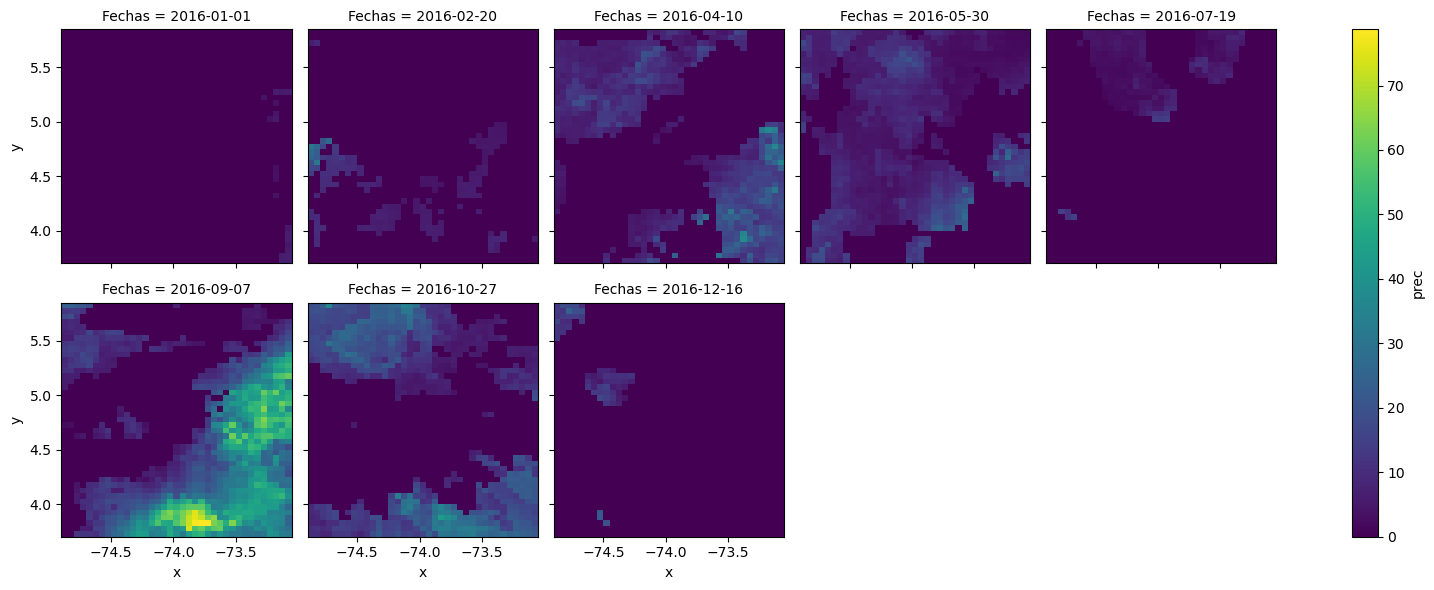

In [47]:
grilla_simple = t.plot(x="x", y="y", col="Fechas", col_wrap=5)

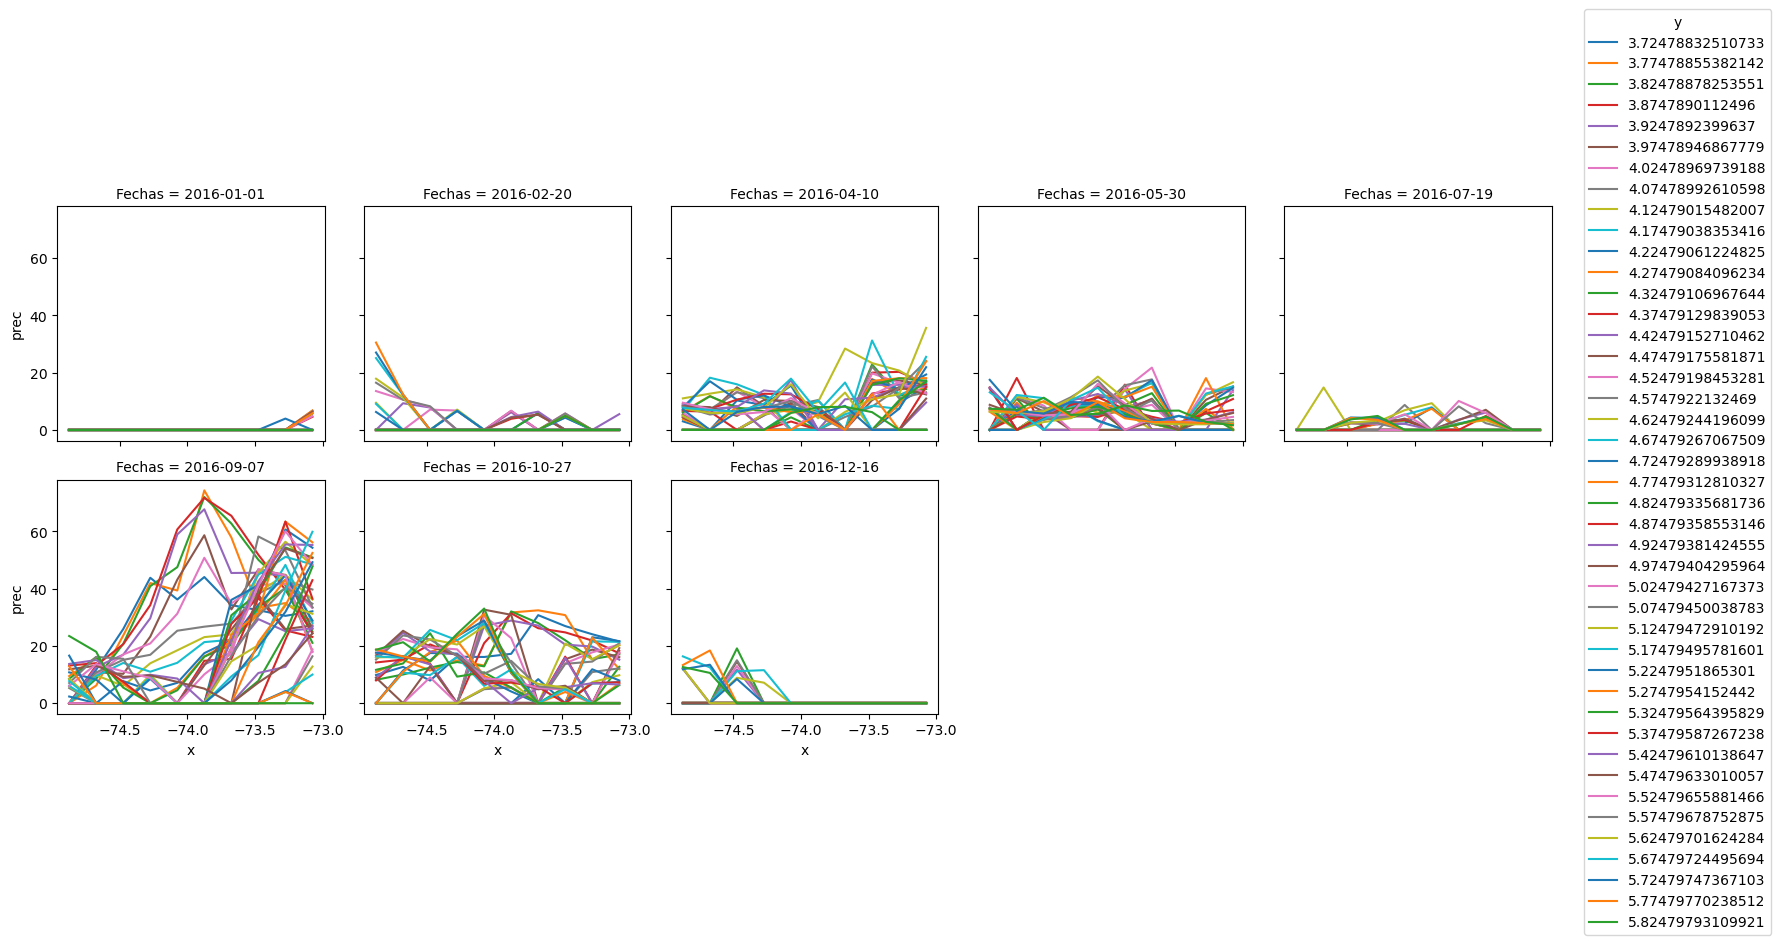

In [48]:
grilla_simple_linea = t.isel(x=slice(0, None, 4)).plot(x="x", hue="y", col="Fechas", col_wrap=5)

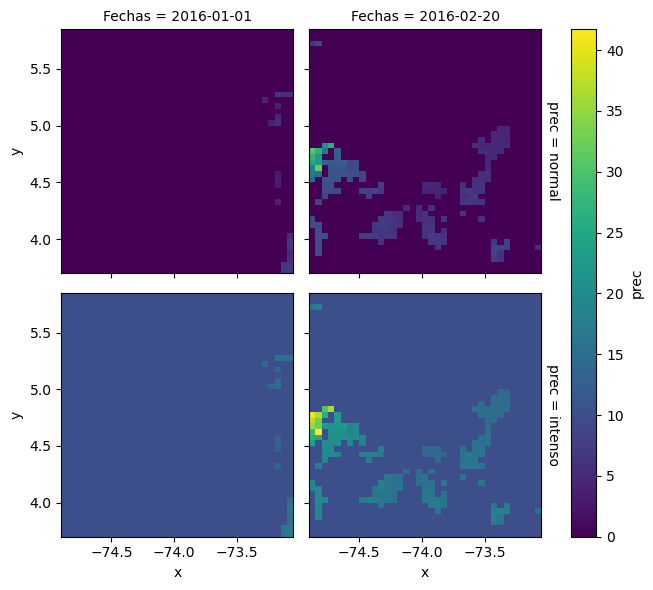

In [49]:
t2 = t.isel(Fechas=slice(0, 2))

t4d = xr.concat([t2, t2 + 10], pd.Index(["normal", "intenso"], name="prec"))

t4d.coords

t4d.plot(x="x", y="y", col="Fechas", row="prec")

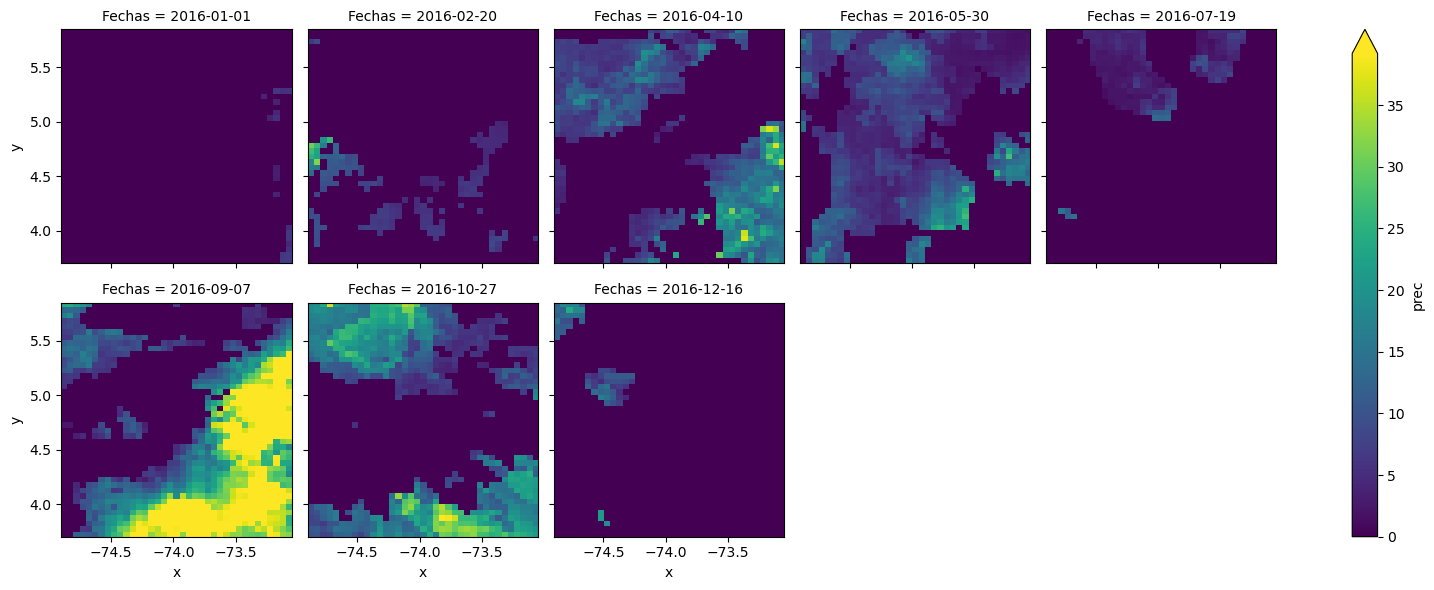

In [50]:
g = t.plot.imshow(x="x", y="y", col="Fechas", col_wrap=5, robust=True)

for i, ax in enumerate(g.axs.flat):
    bottomright = g.axs[-1, -1]
    bottomright.annotate("bottom right", (240, 40))
    plt.draw()

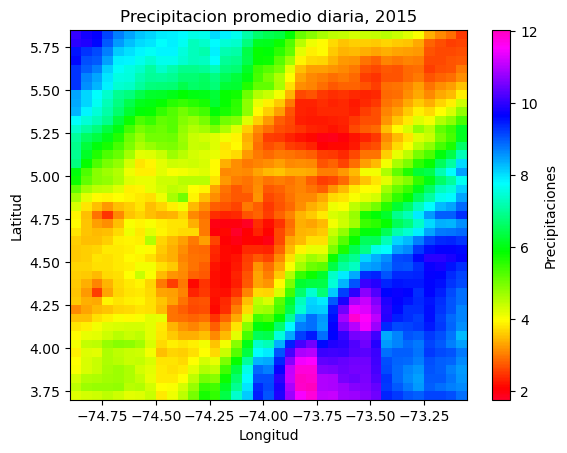

In [51]:
#Promedio
ArregloEspacial.prec.mean(dim='Fechas').plot(x="x",y="y",cmap="gist_rainbow",cbar_kwargs={"label": "Precipitaciones"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Precipitacion promedio diaria, 2015")
plt.show()

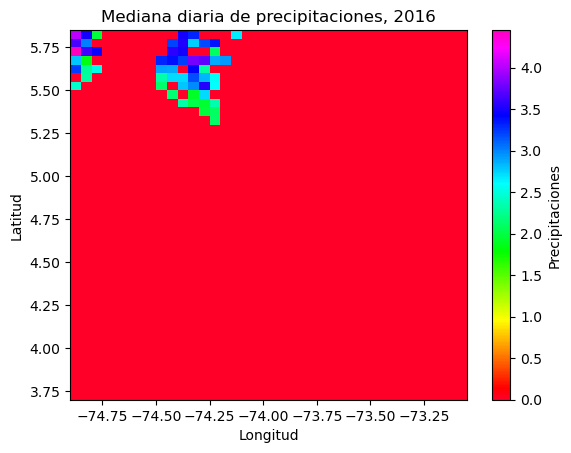

In [52]:
#Mediana
ArregloEspacial.prec.median(dim='Fechas').plot(x="x",y="y",cmap="gist_rainbow",cbar_kwargs={"label": "Precipitaciones"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mediana diaria de precipitaciones, 2016")
plt.show()

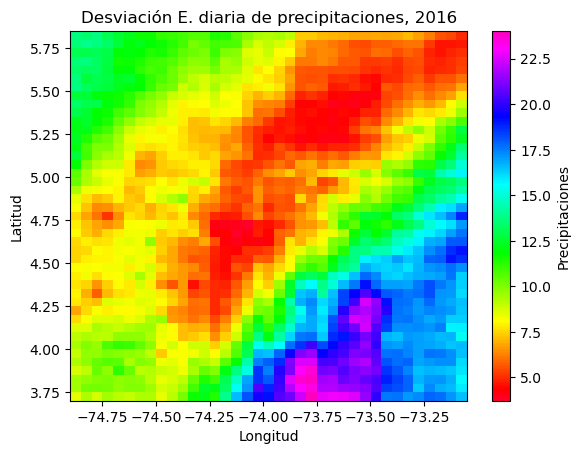

In [53]:
#Desviación estándar
ArregloEspacial.prec.std(dim='Fechas').plot(x="x",y="y",cmap="gist_rainbow",cbar_kwargs={"label": "Precipitaciones"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Desviación E. diaria de precipitaciones, 2016")
plt.show()

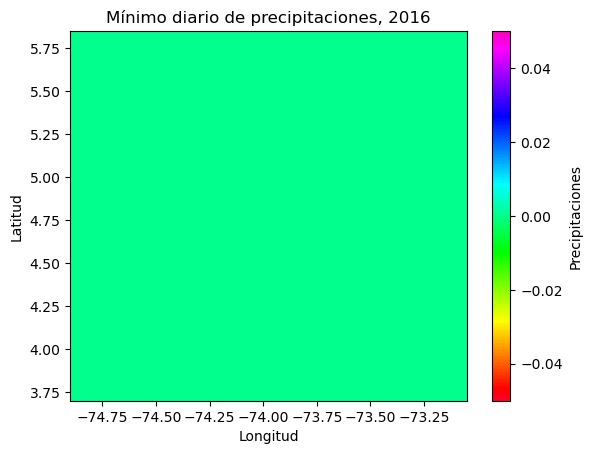

In [54]:
#Mínimo
ArregloEspacial.prec.min(dim='Fechas').plot(x="x",y="y",cmap="gist_rainbow",cbar_kwargs={"label": "Precipitaciones"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mínimo diario de precipitaciones, 2016")
plt.show()

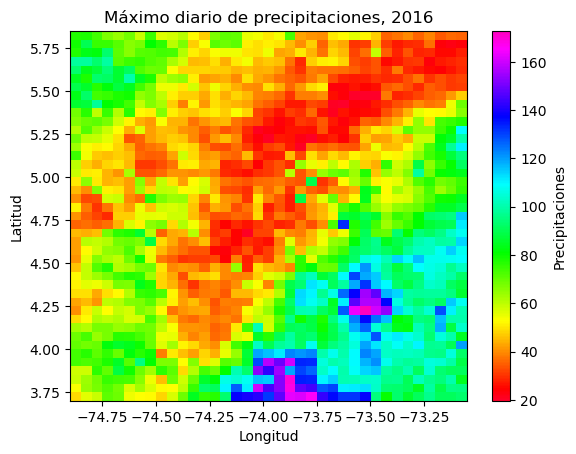

In [55]:
#Máximo
ArregloEspacial.prec.max(dim='Fechas').plot(x="x",y="y",cmap="gist_rainbow",cbar_kwargs={"label": "Precipitaciones"})
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Máximo diario de precipitaciones, 2016")
plt.show()